# Personal Info
- Adityan S
- 20311001
- MSP 3rd Year
- adityan.s@ph.iitr.ac.in

# Importing Python Libraries

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Downloading Data and Initialization

In [191]:
url = 'https://www.kaggle.com/competitions/titanic/data'
od.download(url)
train_filename = './titanic/train.csv'
test_filename = './titanic/test.csv'

Skipping, found downloaded files in "./titanic" (use force=True to force download)


# Data Preparation and Cleaning

## Loading Data with pandas

### Creating `pandas.DataFrame` to hold the downloaded testing and training dataset

In [192]:
df_train = pd.read_csv(train_filename)
df_test = pd.read_csv(test_filename)

### Overall Structure of Training and Testing DataSet

In [193]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [195]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [196]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


- `df_test` does not contain the column *Survived*
- *PassengerId* acts an Unique Identifier for the combined Dataset

## New pandas.DataFrame for Analysis

- One of the important deduction to make is about the survival rate of the passengers above the Titanic.
    So let us ignore that for now and create a `pandas.DataFrame` combining the testing and training datasets
    (will be used later for Machine Learning).

In [197]:
df_train_copy = df_train.copy()
del df_train_copy['Survived']
df = pd.concat([df_train_copy, df_test])
df = df.reset_index(drop=True) # Resets concated indices

In [198]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Missing Data

In [200]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

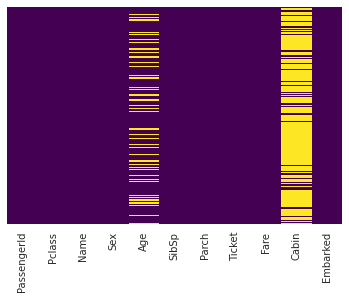

In [201]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Analysis

## Passenger ID

- `PassengerId` $\implies$ Unique Identifier used to go between the Individual testing and training datasets to the combined dataset

## Passenger Class

- `Pclass` $\implies$ Categorical data with 3 ordinals `1`, `2`, `3`

<AxesSubplot:xlabel='Pclass', ylabel='count'>

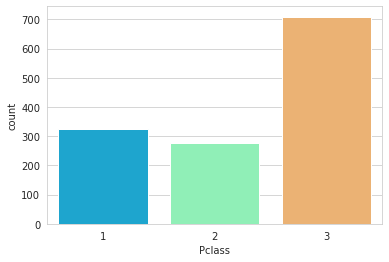

In [202]:
sns.countplot(x='Pclass',data=df, palette='rainbow')

### Corelation of PClass with Survivability

<AxesSubplot:xlabel='Survived', ylabel='count'>

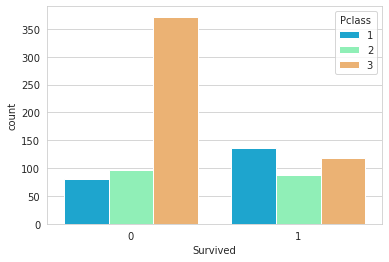

In [203]:
sns.countplot(x='Survived',hue='Pclass',data=df_train ,palette='rainbow')

- From the above plot we can infer that passengers in class 1 and two have $\approx50\%$ survival rate given their lower numbers. And the passengers in class 3 have the lowest ie., $\approx20\%$ survival rate. Hence the data is skewed against the survivability of class 3 passengers. Hence this can be considered a significant variable in the distribution of the age of the passengers and their survivability.

## Sex

- `Sex` $\implies$ Categorical binary data ie., `male`, `female`

<AxesSubplot:xlabel='Sex', ylabel='count'>

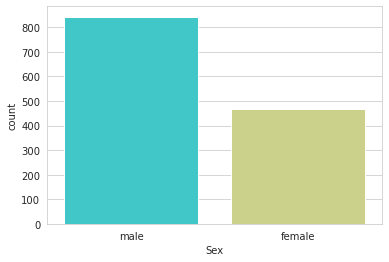

In [204]:
sns.countplot(x='Sex',data=df, palette='rainbow')

### Corelation of Sex with Survivability

<AxesSubplot:xlabel='Survived', ylabel='count'>

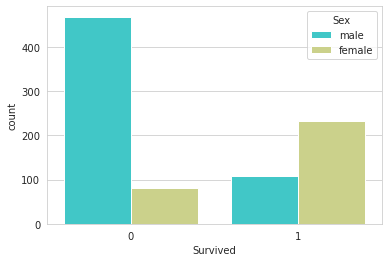

In [205]:
sns.countplot(x='Survived',hue='Sex',data=df_train, palette='rainbow')

- Converting this Categorical data to Numerical : `male = 0` and `female = 1`

In [206]:
df_test['Sex'] = df_test['Sex'].replace(['male', 'female'],[0,1])
df_train['Sex'] = df_train['Sex'].replace(['male', 'female'],[0,1])
df['Sex'] = df['Sex'].replace(['male', 'female'],[0,1])

## Sibling Relations

-`SibSp` $\implies$ Numerical Data on the number of siblings.
- When compared to other variables, `SibSp` can be neglected due to it's lesser significance on survivability.
    (A logical assumption)

In [207]:
del df['SibSp']
del df_train['SibSp']
del df_test['SibSp']

## Parent Relations

-`Parch` $\implies$ Numerical Data on the number of Parents.
- When compared to other variables, `Parch` can be neglected due to it's lesser significance on survivability.
    (A logical assumption)

In [208]:
del df['Parch']
del df_train['Parch']
del df_test['Parch']

## Ticket

-`Ticket` $\implies$ Categorical Data
- Since we already have Numerical data `Fare` and Categorical data `PClass` about the class of the passengers,
    we can neglect `Ticket`

In [209]:
del df['Ticket']
del df_train['Ticket']
del df_test['Ticket']

## Fare

- `Fare` $\implies$ Numerical Data
- From the graph below it is evident that the data is not normalized.

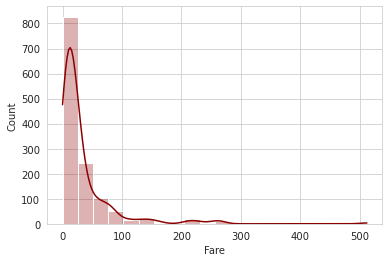

In [210]:
ax = sns.histplot(df['Fare'], bins=20, kde=True,color='darkred',alpha=0.3)

- Normalization :

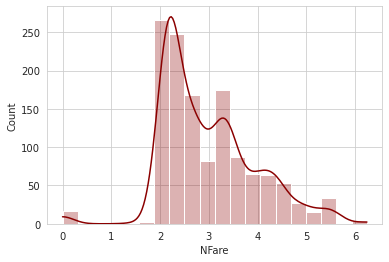

In [211]:
df['NFare'] = np.log(df.Fare+1)
df_train['NFare'] = np.log(df_train.Fare+1)
df_test['NFare'] = np.log(df_test.Fare+1)
ax = sns.histplot(df['NFare'], bins=20, kde=True,color='darkred',alpha=0.3)

In [212]:
del df['Fare']
del df_train['Fare']
del df_test['Fare']

In [213]:
df.NFare = df.NFare.fillna(df.Age.mean())
df_train.NFare = df_train.NFare.fillna(df.Age.mean())
df_test.NFare = df_test.NFare.fillna(df.Age.mean())

## Cabin

- `Cabin` $\implies$ Categorical Data
- Due to $\approx80\%$ data missing, we neglect this.

In [214]:
del df['Cabin']
del df_train['Cabin']
del df_test['Cabin']

## Embarked From

- `Embarked` $\implies$ Categorical data with 3 ordinals : 
    `C` = Cherbourg,
    `Q` = Queenstown,
    `S` = Southampton.
- Since we have only 2 Missing Values $<<<$ Total Entries, they can be imputed with the mode(`S`) of the `Embarked` distribution without worriying about the contributions from other variables

In [215]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [216]:
df['Embarked'].fillna('S', inplace=True)
df_train['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

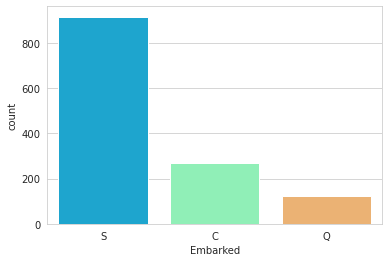

In [217]:
sns.countplot(x='Embarked',data=df, palette='rainbow')

### Corelation of Embarked with Survivability

<AxesSubplot:xlabel='Survived', ylabel='count'>

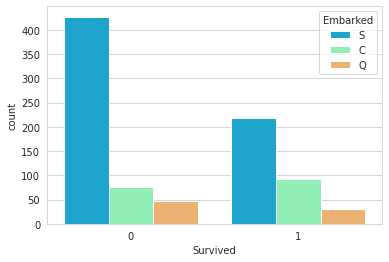

In [218]:
sns.countplot(x='Survived',hue='Embarked',data=df_train ,palette='rainbow')

- Converting this Categorical data to Numerical : `S = 1` , `C = 2` , `Q = 3`

In [219]:
df_test['Embarked'] = df_test['Embarked'].replace(['S', 'C', 'Q'],[1,2,3])
df_train['Embarked'] = df_train['Embarked'].replace(['S', 'C', 'Q'],[1,2,3])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'],[1,2,3])

## Name

- `Name` $\implies$ Categorical Data 
- We can neglect this since we have enought categorical data

In [220]:
del df['Name']
del df_train['Name']
del df_test['Name']

## Age

- `Age` $\implies$ Numerical Data 
- From the heat map we can see the missing values of ages have a distribution. Hence let us check the corelation of age with susceptable variables :

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

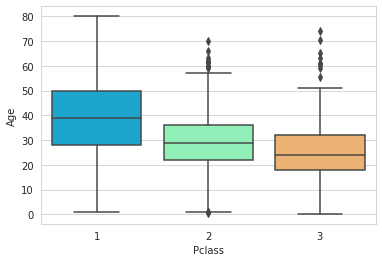

In [221]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

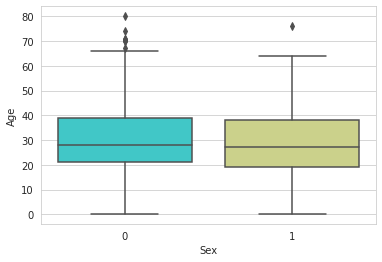

In [222]:
sns.boxplot(x='Sex', y='Age', data=df, palette='rainbow')

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

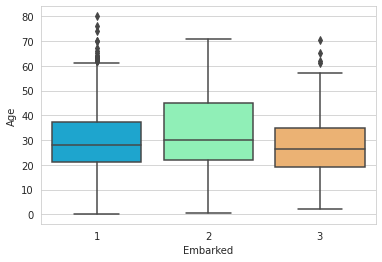

In [223]:
sns.boxplot(x='Embarked', y='Age', data=df, palette='rainbow')

- From these three boxplots it is evident that the mean of `Embarked` and `Sex` are approximately equal for their respective cases. Hence the distribution of age can be solely imputed using mean of `Pclass` .

In [224]:
df.Age = df.Age.fillna(df.Age.mean())
df_train.Age = df_train.Age.fillna(df.Age.mean())
df_test.Age = df_test.Age.fillna(df.Age.mean())

In [225]:
del df['PassengerId']
del df_train['PassengerId']
del df_test['PassengerId']

# Logistic Regression

In [226]:
x_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
x_test = df_test
test = pd.read_csv('./titanic/gender_submission.csv')
y_test = test['Survived']
x_train.tail()

,Pclass,Sex,Age,Embarked,NFare
886,2,0,27.000000,1,2.639057
887,1,1,19.000000,1,3.433987
888,3,1,29.881138,1,3.196630
889,1,0,26.000000,2,3.433987
890,3,0,32.000000,3,2.169054


In [227]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [228]:
predictions = model.predict(x_test)

In [229]:
accuracy_score(y_test, predictions)

0.9473684210526315

# Hence a final result of 95% Accuracy